In [ ]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.tree import DecisionTreeClassifier
from math import sqrt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
from google.cloud import bigquery
from google.colab import auth
auth.authenticate_user()

In [ ]:
project_id = 'skim-dp'
data= 'skim-dp'
client = bigquery.Client(project=project_id)
dataset=client.dataset(data)
df=client.query('select product_name,average_price,publisher_revenue_gbp,total_order_amount,device_type from `skim-dp.test_product_purchase.enriched`').to_dataframe()


In [ ]:
df

,product_name,average_price,publisher_revenue_gbp,total_order_amount,device_type
0,None,None,593.339355,3580,pc
1,None,None,3541.473558,21362,pc
2,Create Your Own Reel Viewer - Create Your Own ...,2995,214.13253,2995,pc
3,None,None,442.849932,2671,pc
4,None,None,613.227825,3699,pc
...,...,...,...,...,...
60884,,2499,126.13531,2499,mobile
60885,Embroidery Border Stripe Shower Curtain Taupe ...,2424,78.67202,2424,mobile
60886,None,None,637.17836,9800,mobile
60887,None,None,810.126772,4985,mobile


In [ ]:
df=df.dropna(subset=['average_price','product_name'])
df['average_price']=(df['average_price']).astype(int)
df['publisher_revenue_gbp']=pd.to_numeric(df['publisher_revenue_gbp'])
df['device_type']=df['device_type'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3202 entries, 2 to 60885
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_name           3202 non-null   object 
 1   average_price          3202 non-null   int64  
 2   publisher_revenue_gbp  3202 non-null   float64
 3   total_order_amount     3202 non-null   object 
 4   device_type            3202 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 150.1+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
x=df[['average_price']]
y=df['publisher_revenue_gbp']
correlation=np.corrcoef(df['average_price'],df['publisher_revenue_gbp'])
correlation

array([[1.        , 0.96752063],
       [0.96752063, 1.        ]])

## Supervised analysis

In [ ]:
df.head()

,product_name,average_price,publisher_revenue_gbp,total_order_amount,device_type
2,Create Your Own Reel Viewer - Create Your Own ...,2995,214.13253,2995,pc
5,Soap & Glory Sit Tight 4D Firming & Smoothing ...,1584,10.49157,2202,pc
6,NIVEA Skin Firming Hydration Body Lotion - 16.9oz,618,4.09330,2202,pc
7,"Lodge 20""x10.5"" Cast Iron Reversable Grill/Gri...",4470,229.37770,7997,pc
8,Cool Touch Mattress Pad () White - Made By Des...,3527,180.98773,7997,pc


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=324)
regressor= LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
r2 = r2_score(y_test,y_pred)
print ('Error of least squares is:',RMSE)
print ('R2 score is: ',r2)
regressor.score(X_test,y_test)


Error of least squares is: 118.1053622865649
R2 score is:  0.9197208203407161


0.9197208203407161

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)
y_pred = pol_reg.predict(X_poly)
RMSE = sqrt(mean_squared_error( y_test, y_pred))
r2 = r2_score(y,y_pred)
print ('Error of least squares is:',RMSE)
print ('R2 score is: ',r2)

ValueError: ignored

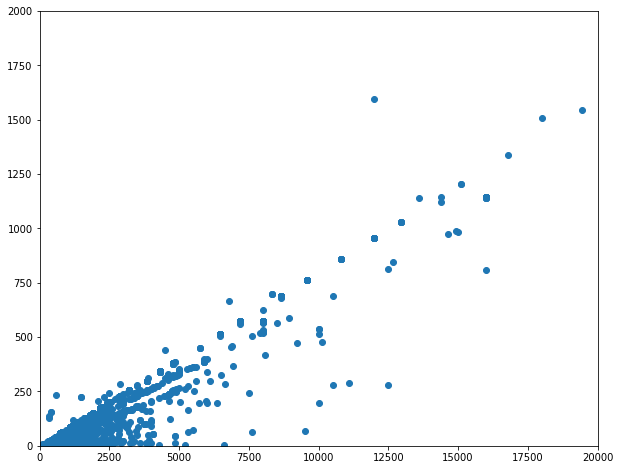

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.scatter(df['average_price'],df['publisher_revenue_gbp'])
ax.set(xlim=(0, 20000), ylim=(0, 2000))
plt.show()

## Unsupervised learning

In [ ]:
newdf=client.query('select merchant_id,publisher_id,product_sku,product_name,product_category from `skim-dp.test_product_purchase.base`').to_dataframe()
newdf.head(10)

,merchant_id,publisher_id,product_sku,product_name,product_category
0,141583,96128,51980077,OxiClean Versatile Stain Remover Powder - 3.5lbs,3
1,141583,96128,13532626,,3
2,141583,96128,75569306,Scotch-Brite Advanced Soap Control Heavy Duty ...,3
3,141583,96128,53084779,,3
4,141583,96128,77063562,,3
5,141583,96128,52900008,Downy Cool Cotton Liquid Fabric Softener - 129oz,3
6,141583,96128,75663830,,3
7,141583,96128,50286396,,3
8,141583,96128,51848255,,3
9,141583,96128,54534012,Pediatric Electrolyte Powder Variety Pack - Up&Up,7


In [ ]:
#x=pd.get_dummies(newdf['product_category'])
#x=x.drop('',axis=1)
x['publisher']=newdf['publisher_id']
x_group=x.groupby('publisher').mean().reset_index()
x_group

,publisher,12017,13,14,15CMBWWRCDJCKTXXXAPO,16CA2WCLSSNTLTNKXAPTA,16PTGWWLSGTSVSTXXAPO,17TNOWWGTHMPRKXXXAPO,17WHGMHGNCRSPCDYSAPT,18,19AVAMMYRNDYD34PRAPO,19AVAMMYRNDYDTSLNAPO,19CA2WDBLSTRPKYHLAPT,19HEDM3PCKPRFRMNCAPU,19QYFMMDSG3N1JCKTAPO,19QYFMPLRFLCHDYXXDSG,19QYFMSLDSSTRNNGTDSG,2,20,200,202,203,204,205,206,207,21,210,211,212,213,215,217,218,22,222,224,226,23,231,...,98,All Products,Austin,Bikini Tops,Brush,Camp Chairs,Camp Classics,Casper Core,Casper Core Hybrid,D26P WATER FILTERS,D27 HEATING & HUMIDIFIERS,D28O HOUSEPLANTS & MISC.,D28O PLANTERS - POTS,D29B COFFEE,D59S TEXTILES,EXISTING,Father&#39;s Day Gifts Under $50,Final Sale,Foundation,GPT,Glitter Gel,Makeup,Merch,Moccasin,NEW,NaN,No Filter Matte Concealer,No Filter Natural Matte Foundation,Products,SHOES,Skincare,Sneaker,Trial Order,Underwear,category,gift,meal Blue Apron Gift Card,notebookconsumer,peeps,single-vision
0,1025,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,34276,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,96128,0.000314,0.00439,0.000941,0.000314,0.000314,0.000314,0.000314,0.000314,0.003763,0.000314,0.000314,0.000314,0.000314,0.000314,0.000314,0.000627,0.007212,0.007526,0.001568,0.000314,0.003763,0.002195,0.002195,0.004704,0.001254,0.003449,0.001254,0.000941,0.013797,0.000314,0.001568,0.000627,0.000314,0.003763,0.002822,0.000314,0.000314,0.001568,0.005331,...,0.000314,0.063656,0.000314,0.000314,0.000314,0.000314,0.000314,0.000314,0.000314,0.000314,0.000314,0.000314,0.000314,0.000314,0.006585,0.001568,0.000314,0.001881,0.000314,0.000314,0.000314,0.03857,0.000314,0.000314,0.001568,0.000941,0.000314,0.000314,0.000314,0.000314,0.001568,0.000627,0.000314,0.006585,0.001568,0.037629,0.000314,0.000314,0.000314,0.000314
3,100094,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,100100,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [ ]:
x_group

,publisher,12017,13,14,15CMBWWRCDJCKTXXXAPO,16CA2WCLSSNTLTNKXAPTA,16PTGWWLSGTSVSTXXAPO,17TNOWWGTHMPRKXXXAPO,17WHGMHGNCRSPCDYSAPT,18,19AVAMMYRNDYD34PRAPO,19AVAMMYRNDYDTSLNAPO,19CA2WDBLSTRPKYHLAPT,19HEDM3PCKPRFRMNCAPU,19QYFMMDSG3N1JCKTAPO,19QYFMPLRFLCHDYXXDSG,19QYFMSLDSSTRNNGTDSG,2,20,200,202,203,204,205,206,207,21,210,211,212,213,215,217,218,22,222,224,226,23,231,...,98,All Products,Austin,Bikini Tops,Brush,Camp Chairs,Camp Classics,Casper Core,Casper Core Hybrid,D26P WATER FILTERS,D27 HEATING & HUMIDIFIERS,D28O HOUSEPLANTS & MISC.,D28O PLANTERS - POTS,D29B COFFEE,D59S TEXTILES,EXISTING,Father&#39;s Day Gifts Under $50,Final Sale,Foundation,GPT,Glitter Gel,Makeup,Merch,Moccasin,NEW,NaN,No Filter Matte Concealer,No Filter Natural Matte Foundation,Products,SHOES,Skincare,Sneaker,Trial Order,Underwear,category,gift,meal Blue Apron Gift Card,notebookconsumer,peeps,single-vision
0,1025,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,34276,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,96128,0.000314,0.00439,0.000941,0.000314,0.000314,0.000314,0.000314,0.000314,0.003763,0.000314,0.000314,0.000314,0.000314,0.000314,0.000314,0.000627,0.007212,0.007526,0.001568,0.000314,0.003763,0.002195,0.002195,0.004704,0.001254,0.003449,0.001254,0.000941,0.013797,0.000314,0.001568,0.000627,0.000314,0.003763,0.002822,0.000314,0.000314,0.001568,0.005331,...,0.000314,0.063656,0.000314,0.000314,0.000314,0.000314,0.000314,0.000314,0.000314,0.000314,0.000314,0.000314,0.000314,0.000314,0.006585,0.001568,0.000314,0.001881,0.000314,0.000314,0.000314,0.03857,0.000314,0.000314,0.001568,0.000941,0.000314,0.000314,0.000314,0.000314,0.001568,0.000627,0.000314,0.006585,0.001568,0.037629,0.000314,0.000314,0.000314,0.000314
3,100094,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,100100,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [ ]:
def return_most_common_categories(row, top_categories):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_categories]

In [ ]:
top_categories = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['publisher']
for ind in np.arange(top_categories):
    try:
        columns.append('{}{} Most Common Category'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Category'.format(ind+1))

In [ ]:
categories_sorted = pd.DataFrame(columns=columns)
categories_sorted['publisher'] = x_group['publisher']

for ind in np.arange(x_group.shape[0]):
    categories_sorted.iloc[ind, 1:] = return_most_common_categories(x_group.iloc[ind, :], top_categories)
categories_sorted

,publisher,1st Most Common Category,2nd Most Common Category,3rd Most Common Category,4th Most Common Category,5th Most Common Category,6th Most Common Category,7th Most Common Category,8th Most Common Category,9th Most Common Category,10th Most Common Category
0,1025,single-vision,267,3,284,283,282,271,270,268,266
1,34276,single-vision,267,3,284,283,282,271,270,268,266
2,96128,All Products,37,3,Makeup,gift,49,52,253,63,94
3,100094,single-vision,267,3,284,283,282,271,270,268,266
4,100100,single-vision,267,3,284,283,282,271,270,268,266
5,125837,single-vision,267,3,284,283,282,271,270,268,266


In [ ]:
categories_sorted

,publisher,1st Most Common Category,2nd Most Common Category,3rd Most Common Category,4th Most Common Category,5th Most Common Category,6th Most Common Category,7th Most Common Category,8th Most Common Category,9th Most Common Category,10th Most Common Category
0,1025,single-vision,267,3,284,283,282,271,270,268,266
1,34276,single-vision,267,3,284,283,282,271,270,268,266
2,96128,All Products,37,3,Makeup,gift,49,52,253,63,94
3,100094,single-vision,267,3,284,283,282,271,270,268,266
4,100100,single-vision,267,3,284,283,282,271,270,268,266
5,125837,single-vision,267,3,284,283,282,271,270,268,266


In [ ]:
from sklearn.cluster import KMeans

kclusters = 5

categories_cluster = x_group.drop('publisher', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(categories_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:40]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  


array([0, 0, 1, 0, 0, 0], dtype=int32)

In [ ]:
categories_sorted['cluster']=kmeans.labels_
categories_sorted

,publisher,1st Most Common Category,2nd Most Common Category,3rd Most Common Category,4th Most Common Category,5th Most Common Category,6th Most Common Category,7th Most Common Category,8th Most Common Category,9th Most Common Category,10th Most Common Category,cluster
0,1025,single-vision,267,3,284,283,282,271,270,268,266,0
1,34276,single-vision,267,3,284,283,282,271,270,268,266,0
2,96128,All Products,37,3,Makeup,gift,49,52,253,63,94,1
3,100094,single-vision,267,3,284,283,282,271,270,268,266,0
4,100100,single-vision,267,3,284,283,282,271,270,268,266,0
5,125837,single-vision,267,3,284,283,282,271,270,268,266,0
